# Unit 5 - Financial Planning


In [60]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [61]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [62]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [63]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [64]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
btc_price

19182.74

In [65]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_price

595.05

In [66]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
crypto_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23019.29
The current value of your 5.3 ETH is $3153.76


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [67]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [68]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [69]:
# Format current date as ISO format
today = pd.Timestamp("2020-12-04", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                       SPY  \
                            open   high       low   close   volume    open   
2020-12-04 00:00:00-05:00  117.9  117.9  117.5133  117.58  4821820  367.32   

                                                             
                             high     low   close    volume  
2020-12-04 00:00:00-05:00  369.85  367.22  369.83  40264568

In [70]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.58
Current SPY closing price: $369.83


In [71]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
shares_value = my_spy_value + my_agg_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18491.50
The current value of your 200 AGG shares is $23516.00


### Savings Health Analysis

In [75]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = {
    'amount': [crypto_value, shares_value]
}

investments = ['Crypto', 'Shares']

df_savings = pd.DataFrame(df_savings, index=investments)

# Display savings DataFrame
display(df_savings)

,amount
Crypto,26173.053
Shares,42007.500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F88C070E08>],
      dtype=object)

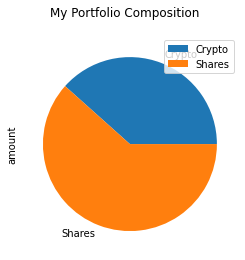

In [79]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, title='My Portfolio Composition')

In [82]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [86]:
# Calculate total amount of savings
total_savings = sum(df_savings['amount'])
total_savings

68180.553

In [87]:
# Validate saving health
if total_savings > emergency_fund:
    print("Congrats! You have enough savings to cover an emergency!")
elif total_savings == emergency_fund:
    print("Congrats! You've reached your financial goal!")
else:
    dollars_to_goal = emergency_fund - total_savings
    print(f"Keep up the work! Only ${dollars_to_goal} to your savings goal!")

Congrats! You have enough savings to cover an emergency!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [90]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [92]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [99]:
# Create an empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of AGG and SPY
df_closing_prices['AGG'] = df_stock_data['AGG']['close']
df_closing_prices['SPY'] = df_stock_data['SPY']['close']

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Calculate the daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()
df_daily_returns.head()

,AGG,SPY
2015-08-10,-0.001374,0.012745
2015-08-11,0.003301,-0.009260
2015-08-12,-0.000548,0.001246
2015-08-13,-0.001920,-0.001245
2015-08-14,-0.000550,0.003691


In [102]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [103]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [104]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000366,0.993359,0.997002,1.007816,0.994426,0.995138,1.002036,0.998393,1.002972,1.003482,...,0.996851,1.004857,1.002275,0.997770,1.000498,0.997322,0.999866,0.999327,1.002456,0.989537
2,1.005918,0.987486,0.998175,1.003364,0.998164,0.996979,1.000403,0.992751,1.004013,0.998417,...,0.992467,1.004411,1.004905,0.999605,0.999675,1.011690,1.000801,0.994807,0.993080,0.992772
3,1.002815,0.993554,0.997574,1.004351,0.989261,0.996643,0.993770,0.997559,1.006181,0.999607,...,0.985201,1.005870,1.013568,1.002557,0.999386,1.011447,0.998044,0.998904,0.985988,0.997612
4,1.001742,0.998336,1.006738,1.007977,0.994111,0.998864,0.997307,0.995813,1.010465,1.003831,...,0.992787,0.998835,1.009022,1.006787,0.999791,1.009547,0.993677,0.999888,0.996687,0.999358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.633247,5.680482,8.874816,3.877995,3.152828,5.135376,9.928563,2.969685,4.617094,13.721317,...,3.782675,4.525528,6.403970,3.570454,3.709682,6.978096,7.953790,6.170559,3.998440,10.790222
7557,6.598385,5.640986,8.897386,3.881490,3.172041,5.143978,9.945051,2.979471,4.616787,13.699450,...,3.764211,4.563535,6.457194,3.574591,3.685235,7.005277,7.906378,6.201066,4.012413,10.801727
7558,6.537357,5.639503,8.926405,3.872069,3.152411,5.141545,9.902545,2.966571,4.622865,13.714305,...,3.743948,4.559081,6.466648,3.542986,3.717868,7.001301,7.940200,6.190184,4.046461,10.837969
7559,6.536974,5.632252,8.921814,3.893743,3.148758,5.122644,9.844625,2.969353,4.605863,13.809002,...,3.754674,4.583984,6.496014,3.582564,3.757668,7.046121,7.906482,6.178324,4.058951,10.782338


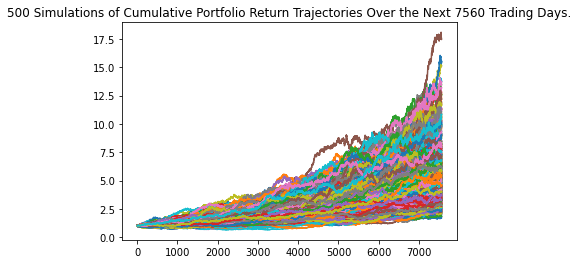

In [106]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()
line_plot

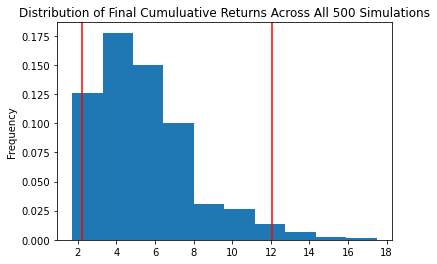

In [107]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()
dist_plot

### Retirement Analysis

In [109]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.462788
std               2.528785
min               1.707794
25%               3.599087
50%               5.046467
75%               6.662362
max              17.472966
95% CI Lower      2.213154
95% CI Upper     12.056669
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [111]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(initial_investment * tbl[8], 2)
ci_upper = round(initial_investment * tbl[9], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $44263.07 and $241133.39


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [112]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(initial_investment * tbl[8], 2)
ci_upper = round(initial_investment * tbl[9], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $66394.61 and $361700.08
